<a href="https://colab.research.google.com/github/ramapriyakj/ML6/blob/master/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
data_set_dir = root_dir + 'Colab Notebooks/dataset/data/'

In [0]:
import os
import cv2
import numpy as np
def create_data_with_labels(image_dir):
    mug_dirs = [f for f in os.listdir(image_dir) if not f.startswith('.')]
    mug_files = []

    for mug_dir in mug_dirs:
        mug_image_files = [image_dir + mug_dir + '/' + '{0}'.format(f)
                           for f in os.listdir(image_dir + mug_dir) if not f.startswith('.')]
        mug_files += [mug_image_files]

    num_images = len(mug_files[0])
    images_np_arr = np.empty([len(mug_files), num_images, 64, 64, 3], dtype=np.float32)

    for mug, _ in enumerate(mug_files):
        for mug_image in range(num_images):
            img = cv2.imread(mug_files[mug][mug_image])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype(np.float32)
            images_np_arr[mug][mug_image] = img / 255.

    data = images_np_arr[0]
    labels = np.full(num_images, int(mug_dirs[0][0]))

    for i in range(1, len(mug_dirs)):
        data = np.append(data, images_np_arr[i], axis=0)
        labels = np.append(labels, np.full(num_images, int(mug_dirs[i][0])), axis=0)

    return data, labels

In [0]:
train_data, train_labels = create_data_with_labels(data_set_dir+"train/")
eval_data, eval_labels = create_data_with_labels(data_set_dir+"test/")

In [0]:
from keras.utils import np_utils
train_y = np_utils.to_categorical(train_labels)
eval_y = np_utils.to_categorical(eval_labels)
print(train_data.shape,train_y.shape,eval_data.shape,eval_y.shape)

(2000, 64, 64, 3) (2000, 4) (1000, 64, 64, 3) (1000, 4)


In [0]:
from keras import layers
from keras import models
from keras import optimizers
def getModel():
  model = models.Sequential()
  model.add(layers.Conv2D(128, (3, 3),activation='relu',input_shape=(64, 64, 3))) 
  model.add(layers.Conv2D(128, (2, 2),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3),activation='relu'))
  model.add(layers.Conv2D(64, (2, 2),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3),activation='relu'))
  model.add(layers.Conv2D(32, (2, 2),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(256,activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(2e-05),metrics=['acc'])
  return model

from keras.preprocessing.image import ImageDataGenerator
model = getModel()
train_datagen = ImageDataGenerator(width_shift_range=0.4,height_shift_range=0.3,shear_range=0.2,zoom_range=0.1,channel_shift_range=0.2,fill_mode='nearest')
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(train_data,train_y,batch_size=20)
validation_generator = test_datagen.flow(eval_data,eval_y,batch_size=20)
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 19s 195ms/step - loss: 1.7458 - acc: 0.3220 - val_loss: 1.8430 - val_acc: 0.3100
Epoch 2/30
100/100 [==============================] - 7s 74ms/step - loss: 1.4423 - acc: 0.4380 - val_loss: 1.3501 - val_acc: 0.4250
Epoch 3/30
100/100 [==============================] - 7s 73ms/step - loss: 1.3005 - acc: 0.4775 - val_loss: 0.9539 - val_acc: 0.6020
Epoch 4/30
100/100 [==============================] - 7s 73ms/step - loss: 1.0823 - acc: 0.5760 - val_loss: 0.8944 - val_acc: 0.6360
Epoch 5/30
100/100 [==============================] - 7s 73ms/step - loss: 0.9713 - acc: 0.6280 - val_loss: 0.9059 - val_acc: 0.6340
Epoch 6/30
100/100 [==============================] - 7s 71ms/step - loss: 0.8502 - acc: 0.6765 - val_loss: 0.6995 - val_acc: 0.7190
Epoch 7/30
100/100 [==============================] - 7s 72ms/step - loss: 0.7634 - acc: 0.7050 - val_loss: 0.6017 - val_acc: 0.7740
Epoch 8/30
100/100 [==============================] - 7s 73ms/step 

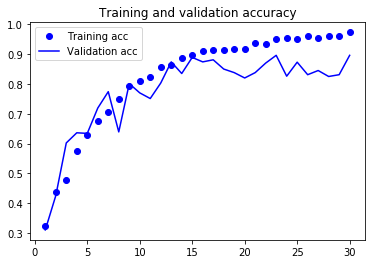

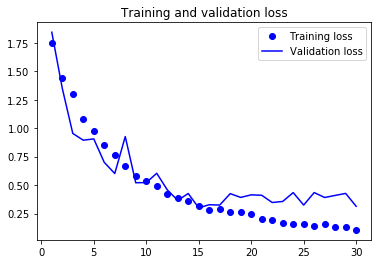

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()